# 전체코드

## 라이브러리 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.subplots import make_subplots
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.isotonic import IsotonicRegression

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/머신러닝 스터디/Bankrupcy 프로젝트/data.csv')

In [ ]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## 데이터 전처리

In [ ]:
data.info()
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [ ]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles
    # Q1, Q3 값을 초과하거나 미만인 값들에 대해 이상치 제거 작업
    
    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    #print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    #print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    #print('Cut Off: {}'.format(feat_cut_off))
    #print(feature_name +' Lower: {}'.format(feat_lower))
    #print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    #print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    #print('-' * 65)
    
    return dataset

for col in data:
    df = outliers_removal(data[col],str(col),data)

df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6812,0,0.491639,0.549498,0.537877,0.613219,0.613168,0.998999,0.797436,0.809344,0.303543,...,0.806743,0.000548,0.623743,0.613219,0.840676,0.276560,0.026811,0.565253,1,0.061753
6813,0,0.477600,0.531127,0.526099,0.595829,0.595858,0.998905,0.797375,0.809294,0.303634,...,0.794028,0.003475,0.623398,0.595827,0.839864,0.281325,0.022309,0.571752,1,0.024803
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284


In [ ]:
df.corr()['Bankrupt?'].sort_values(ascending=False)

# 눈에 띄게 큰 상관계수 값을 갖는 변수가 거의 없음(종속변수에 크리티컬한 영향을 미치는 변수 판단 불가). 따라서, 상관계수 가지고 분석하기보다 다른 방법 생각

Bankrupt?                                                   1.000000
 Debt ratio %                                               0.260814
 Total debt/Total net worth                                 0.229542
 Current Liability to Assets                                0.192470
 Borrowing dependency                                       0.173991
                                                              ...   
 ROA(C) before interest and depreciation before interest   -0.273792
 ROA(B) before interest and depreciation after tax         -0.286875
 ROA(A) before interest and % after tax                    -0.299326
 Net Income to Total Assets                                -0.330840
 Net Income Flag                                                 NaN
Name: Bankrupt?, Length: 96, dtype: float64

## 데이터 나누기

In [ ]:
y = df['Bankrupt?']
x = df.drop(['Bankrupt?'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## 변수 선택

In [ ]:
# 1. 랜덤포레스트 이용하여 변수중요도 탐색 후 feature 추려내기
# 2. mutual information 이용하여 영향력 있는 feature 탐색하기
# 3. 1과 2를 결합하여 최종 feature 목록 산출

### feature importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [ ]:
model = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)
model.fit(x_train, y_train)
# 변수중요도 탐색
sel = SelectFromModel(model)

In [ ]:
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000, n_jobs=-1,
                                                 random_state=0))

In [ ]:
model.feature_importances_

array([0.01180612, 0.01074627, 0.01189147, 0.0071737 , 0.00680706,
       0.00716055, 0.01032792, 0.01094433, 0.01630229, 0.01447215,
       0.01063791, 0.00734905, 0.00673589, 0.01630491, 0.00235929,
       0.01636399, 0.01505743, 0.01442767, 0.03008695, 0.00614891,
       0.00779338, 0.00801971, 0.02400008, 0.00712757, 0.00754717,
       0.00729422, 0.00752846, 0.00843393, 0.00840743, 0.02532173,
       0.01095567, 0.00641833, 0.00872897, 0.01257395, 0.01867139,
       0.01359153, 0.01214988, 0.01221831, 0.0079809 , 0.02065133,
       0.0057721 , 0.00788775, 0.02878859, 0.00733098, 0.00612877,
       0.01205786, 0.01089668, 0.00774157, 0.01057036, 0.00617632,
       0.00912236, 0.01003101, 0.0099621 , 0.01439389, 0.00660153,
       0.00740541, 0.01692056, 0.00945436, 0.01501973, 0.0082315 ,
       0.00631816, 0.01073813, 0.00725118, 0.00712719, 0.01394987,
       0.00834555, 0.00567688, 0.00980706, 0.01169563, 0.00795015,
       0.00797931, 0.00871548, 0.00903165, 0.00809361, 0.00707

In [ ]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)
# 랜덤포레스트 결과 총 38개의 feature가 중요도 높은 변수로 판단됨

38

In [ ]:
selected_feat

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Average Collection Days',
       ' Fixed Assets Turnover Frequency', ' Working Capital to Total 

### mutual information

In [ ]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

In [ ]:
mi = mutual_info_classif(x_train, y_train)
mi

array([3.80593384e-02, 3.63131615e-02, 3.36382697e-02, 1.51388469e-02,
       1.62389634e-02, 1.84294795e-02, 3.13768654e-02, 3.04132964e-02,
       3.13207442e-02, 3.72433779e-02, 0.00000000e+00, 3.01446215e-03,
       1.20705776e-02, 8.12465636e-05, 2.05657683e-02, 3.11370110e-02,
       3.05147675e-02, 2.81156125e-02, 4.64602282e-02, 7.66924314e-03,
       2.72003927e-03, 2.30153205e-02, 4.70748549e-02, 1.21219330e-02,
       7.77723240e-03, 1.47824036e-02, 1.31788757e-02, 1.06004632e-02,
       1.50197108e-02, 2.11720117e-03, 1.48798754e-02, 0.00000000e+00,
       2.01343702e-02, 2.53359959e-02, 3.38380526e-02, 3.12427777e-02,
       3.19147582e-02, 3.16757197e-02, 1.00161125e-02, 3.90656705e-02,
       3.13480573e-03, 2.42378019e-02, 4.69475498e-02, 3.51470924e-03,
       9.04285766e-03, 0.00000000e+00, 8.32319534e-04, 6.34233778e-04,
       5.11163522e-03, 2.57872296e-03, 0.00000000e+00, 1.95416045e-02,
       4.06619601e-03, 2.67941144e-02, 1.30518977e-03, 9.25249896e-04,
      

In [ ]:
train_df = pd.DataFrame(x_train, columns = x_train.columns)

Text(0, 0.5, 'Mutual Information')

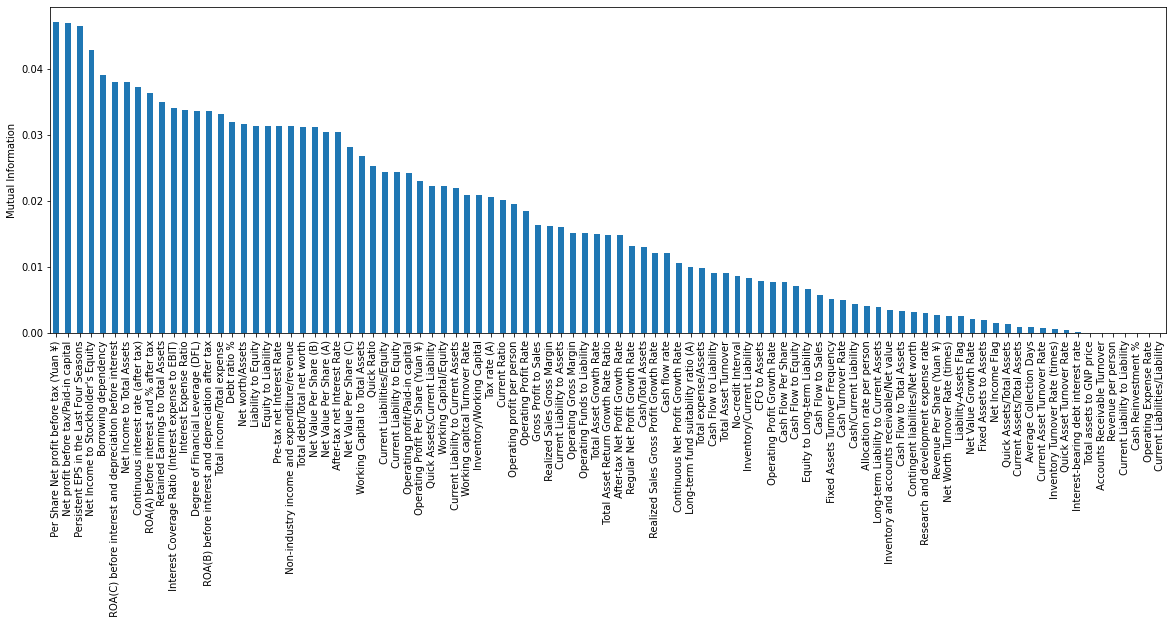

In [ ]:
mi = pd.Series(mi)
mi.index = train_df.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20, 6))
plt.ylabel('Mutual Information')

In [ ]:
# select features
sel_ = SelectKBest(mutual_info_classif, k=38).fit(x_train, y_train)

# display features
train_df.columns[sel_.get_support()]

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Pre-tax net Interest Rate', ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)', ' Current Ratio',
       ' Quick Ratio', ' Interest Expense Ratio',
       ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets',
       ' Borrowing dependency', ' Operating profit/Paid-in capital',
       ' Net profit before tax/Paid-in capital',
       ' Operating profit per person', ' Working Capital to Total Assets',
       ' Working Capital/Equity', ' Current Liabilities

### 최종 선택된 48개 column 데이터

In [ ]:
columns = selected_feat|train_df.columns[sel_.get_support()]
len(columns)
# 위 두 가지 방법에 의해 추출된 feature들의 합집합을 목록으로 하는 최종 데이터셋 생성

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead



49

In [ ]:
x_train_last = x_train[columns]
x_train_last

,Accounts Receivable Turnover,After-tax net Interest Rate,Average Collection Days,Borrowing dependency,Cash/Current Liability,Cash/Total Assets,Continuous interest rate (after tax),Current Liabilities/Equity,Current Liability to Current Assets,Current Liability to Equity,...,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Retained Earnings to Total Assets,Tax rate (A),Total Asset Return Growth Rate Ratio,Total debt/Total net worth,Total income/Total expense,Working Capital to Total Assets,Working Capital/Equity,Working capitcal Turnover Rate
5366,5.214410e-04,0.809107,0.012149,0.374203,0.003108,0.067344,0.781346,0.331425,0.023285,0.331425,...,0.463033,0.415151,0.918326,0.000000,0.263409,0.006696,0.002095,0.859851,0.739740,0.594036
3982,7.892628e-04,0.809394,0.008018,0.369637,0.017200,0.216961,0.781661,0.328443,0.010591,0.328443,...,0.573050,0.522108,0.947087,0.094544,0.264116,0.002624,0.002389,0.958068,0.742975,0.594020
5138,6.675256e-04,0.809151,0.009488,0.386378,0.000687,0.021493,0.781397,0.338859,0.048821,0.338859,...,0.495101,0.450934,0.925073,0.000000,0.263299,0.017410,0.002056,0.749154,0.731756,0.593913
4236,1.213314e-03,0.809426,0.005217,0.369637,0.005894,0.117495,0.781686,0.330746,0.020522,0.330746,...,0.612720,0.576951,0.953050,0.217330,0.264469,0.005848,0.002642,0.876995,0.740485,0.593965
3229,1.111866e-03,0.809475,0.005683,0.371570,0.007396,0.058665,0.781740,0.327602,0.022781,0.327602,...,0.570855,0.511237,0.931407,0.000000,0.265263,0.002671,0.002418,0.792200,0.734145,0.593994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5389,8.866525e-04,0.809344,0.007128,0.371214,0.003529,0.066739,0.781631,0.330769,0.031258,0.330769,...,0.546978,0.492127,0.934923,0.015690,0.263714,0.006744,0.002274,0.799160,0.735407,0.593944
3526,1.079403e-03,0.809620,0.005861,0.369637,0.034988,0.351376,0.781892,0.328137,0.011236,0.328137,...,0.646234,0.607030,0.945574,0.225225,0.264423,0.003660,0.002488,0.903847,0.740799,0.594107
1742,6.634677e-04,0.809340,0.009530,0.372794,0.004292,0.052648,0.781547,0.328543,0.023850,0.328543,...,0.550725,0.509628,0.933736,0.225529,0.263990,0.003494,0.002293,0.809582,0.735293,0.593991
2763,9.586804e-03,0.809319,0.000659,0.370354,0.020126,0.123350,0.781574,0.327182,0.026511,0.327182,...,0.534343,0.483206,0.930897,0.000000,0.264304,0.001675,0.002250,0.774179,0.733075,0.593924


In [ ]:
x_test_last = x_test[columns]
x_test_last

,Accounts Receivable Turnover,After-tax net Interest Rate,Average Collection Days,Borrowing dependency,Cash/Current Liability,Cash/Total Assets,Continuous interest rate (after tax),Current Liabilities/Equity,Current Liability to Current Assets,Current Liability to Equity,...,ROA(B) before interest and depreciation after tax,ROA(C) before interest and depreciation before interest,Retained Earnings to Total Assets,Tax rate (A),Total Asset Return Growth Rate Ratio,Total debt/Total net worth,Total income/Total expense,Working Capital to Total Assets,Working Capital/Equity,Working capitcal Turnover Rate
573,0.001181,0.809466,5.359987e-03,0.372572,0.018445,0.137094,0.781736,0.327593,0.019101,0.327593,...,0.572193,0.527275,0.938785,0.145764,0.264266,0.003388,0.002379,0.803671,0.734930,0.593984
924,0.000682,0.809402,9.262351e-03,0.378489,0.003713,0.066535,0.781668,0.331540,0.023855,0.331540,...,0.553616,0.510554,0.938502,0.260755,0.264080,0.010457,0.002395,0.836790,0.739546,0.593991
5754,0.000359,0.809565,1.756235e-02,0.370826,0.009757,0.105554,0.781804,0.328121,0.022745,0.328121,...,0.570748,0.530493,0.946391,0.301144,0.264470,0.002639,0.002516,0.807554,0.734958,0.594016
1227,0.000408,0.809281,1.548479e-02,0.376495,0.000539,0.012227,0.781537,0.331730,0.037229,0.331730,...,0.527009,0.482475,0.930224,0.000000,0.263781,0.006868,0.002203,0.782449,0.734225,0.593951
2491,0.357840,0.817723,1.790000e+09,0.371259,0.002248,0.020584,0.790431,0.327702,0.173133,0.327702,...,0.641094,0.587189,0.960268,0.077235,0.264451,0.001794,0.005899,0.719208,0.730363,0.593281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,0.001449,0.809304,4.366891e-03,0.375025,0.000680,0.014161,0.781550,0.330726,0.047725,0.330726,...,0.522298,0.465022,0.913850,0.000000,0.265218,0.005150,0.002224,0.751822,0.732000,0.593915
2141,0.000872,0.809320,7.241148e-03,0.370627,0.010029,0.245033,0.781593,0.332925,0.025011,0.332925,...,0.538037,0.493248,0.932918,0.519891,0.263781,0.008923,0.002260,0.857495,0.740640,0.593963
4150,0.001073,0.809312,5.891972e-03,0.370247,0.006146,0.115900,0.781574,0.330069,0.038567,0.330069,...,0.543391,0.499196,0.941301,0.547019,0.262733,0.004352,0.002236,0.773065,0.733291,0.593927
5443,0.000424,0.809381,1.490584e-02,0.369637,0.002081,0.028318,0.781639,0.328819,0.021815,0.328819,...,0.538626,0.485448,0.938743,0.056990,0.263582,0.003572,0.002375,0.828006,0.736374,0.593983


## 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler
# PCA 이전 표준화 실시
ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train_last)
x_test_scaled = ss.transform(x_test_last)

## PCA

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(random_state=0)
X_p = pca.fit_transform(x_train_scaled)

pd.Series(np.cumsum(pca.explained_variance_ratio_))

0     0.235554
1     0.354018
2     0.449395
3     0.510063
4     0.546410
5     0.579939
6     0.608050
7     0.634794
8     0.660096
9     0.684265
10    0.705689
11    0.726961
12    0.747848
13    0.768224
14    0.788355
15    0.808382
16    0.827900
17    0.847127
18    0.864476
19    0.881593
20    0.897312
21    0.912591
22    0.927419
23    0.939511
24    0.950469
25    0.959915
26    0.967365
27    0.974042
28    0.978994
29    0.983690
30    0.987971
31    0.991232
32    0.993905
33    0.995485
34    0.996784
35    0.997724
36    0.998472
37    0.998863
38    0.999210
39    0.999509
40    0.999693
41    0.999863
42    0.999941
43    0.999968
44    0.999987
45    0.999996
46    1.000000
47    1.000000
48    1.000000
dtype: float64

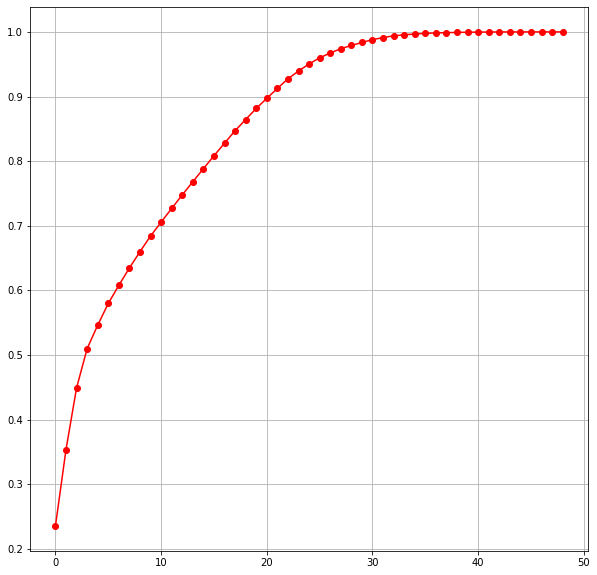

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [ ]:
pca_new = PCA(n_components=15)

X_train_pca = pca_new.fit_transform(x_train_scaled)
X_test_pca = pca_new.transform(x_test_scaled)

## SMOTE or ADACYN

In [ ]:
# smote
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
X_train_over,y_train_over = smote.fit_resample(X_train_pca,y_train)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train_pca.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5016, 15) (5016,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (9688, 15) (9688,)
SMOTE 적용 후 레이블 값 분포: 
 0    4844
1    4844
Name: Bankrupt?, dtype: int64


In [ ]:
'''
# ADASYN
from imblearn.over_sampling import ADASYN
from collections import Counter
ads = ADASYN(random_state=42, n_neighbors=9)
X_ads, y_ads = ads.fit_resample(X_train_pca,y_train)
print('Original', Counter(y_train))
print('Resampled', Counter(y_ads))
'''

"\n# ADASYN\nfrom imblearn.over_sampling import ADASYN\nfrom collections import Counter\nads = ADASYN(random_state=42, n_neighbors=9)\nX_ads, y_ads = ads.fit_resample(X_train_pca,y_train)\nprint('Original', Counter(y_train))\nprint('Resampled', Counter(y_ads))\n"

In [ ]:
'''# random over-sampling
from imblearn.over_sampling import RandomOverSampler
import imblearn

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=1.0)

# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train_pca,y_train)
#compter combien de 1 et de 0 dans dataset
y_train=y_over
X_train_pca=X_over
y_train =pd.DataFrame(y_train)
y_train.value_counts()'''

"# random over-sampling\nfrom imblearn.over_sampling import RandomOverSampler\nimport imblearn\n\n# define oversampling strategy\noversample = RandomOverSampler(sampling_strategy='minority')\n\n# define oversampling strategy\noversample = RandomOverSampler(sampling_strategy=1.0)\n\n# fit and apply the transform\nX_over, y_over = oversample.fit_resample(X_train_pca,y_train)\n#compter combien de 1 et de 0 dans dataset\ny_train=y_over\nX_train_pca=X_over\ny_train =pd.DataFrame(y_train)\ny_train.value_counts()"

## 모델링

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
# SMOTE 없이
# lr = LogisticRegression()
# lr.fit(X_train_pca,y_train)
# lr_predict = lr.predict(X_test_pca)

# lr_conf_matrix = confusion_matrix(y_test, lr_predict) 
# lr_acc_score = accuracy_score(y_test, lr_predict) 
# print(lr_conf_matrix)
# print(lr_acc_score*100)
# print(classification_report(y_test, lr_predict, target_names=['파산X', '파산O']))

# SMOTE
lr_smote = LogisticRegression()
lr_smote.fit(X_train_over,y_train_over)
lr_smote_predict = lr_smote.predict(X_test_pca)

lr_smote_conf_matrix = confusion_matrix(y_test, lr_smote_predict) 
lr_smote_acc_score = accuracy_score(y_test, lr_smote_predict) 
print(lr_smote_conf_matrix)
print(lr_smote_acc_score*100)
print(classification_report(y_test, lr_smote_predict, target_names=['파산X', '파산O']))

[[1038  170]
 [   9   37]]
85.725677830941
              precision    recall  f1-score   support

         파산X       0.99      0.86      0.92      1208
         파산O       0.18      0.80      0.29        46

    accuracy                           0.86      1254
   macro avg       0.59      0.83      0.61      1254
weighted avg       0.96      0.86      0.90      1254



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# SMOTE 없이
# rf = RandomForestClassifier()
# rf.fit(X_train_pca, y_train)
# rf_predict=rf.predict(X_test_pca)

# rf_conf_matrix = confusion_matrix(y_test, rf_predict)
# rf_acc_score = accuracy_score(y_test, rf_predict)
# print(rf_conf_matrix)
# print(rf_acc_score*100)
# print(classification_report(y_test, rf_predict, target_names=['파산X', '파산O']))

# SMOTE
rf_smote = RandomForestClassifier()
rf_smote.fit(X_train_over, y_train_over)
rf_smote_predict=rf_smote.predict(X_test_pca)

rf_smote_conf_matrix = confusion_matrix(y_test, rf_smote_predict)
rf_smote_acc_score = accuracy_score(y_test, rf_smote_predict)
print(rf_smote_conf_matrix)
print(rf_smote_acc_score*100)
print(classification_report(y_test, rf_smote_predict, target_names=['파산X', '파산O']))

[[1154   54]
 [  26   20]]
93.62041467304624
              precision    recall  f1-score   support

         파산X       0.98      0.96      0.97      1208
         파산O       0.27      0.43      0.33        46

    accuracy                           0.94      1254
   macro avg       0.62      0.70      0.65      1254
weighted avg       0.95      0.94      0.94      1254



### XGboost

In [ ]:
from xgboost import XGBClassifier
# xgb1 = XGBClassifier(n_estimators = 100)
# xgb1.fit(X_train_pca, y_train)

# score1 = xgb1.score(X_test_pca, y_test)
# print(score1)

xgb_smote = XGBClassifier(n_estimators = 100)
xgb_smote.fit(X_train_over, y_train_over)

score_smote = xgb_smote.score(X_test_pca, y_test)
print(score_smote)

0.8779904306220095


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# dt = DecisionTreeClassifier()
# dt.fit(X_train_pca,y_train)
# dt_predict = dt.predict(X_test_pca)

# dt_conf_matrix = confusion_matrix(y_test, dt_predict)
# dt_acc_score = accuracy_score(y_test, dt_predict)
# print(dt_conf_matrix)
# print(dt_acc_score*100)
# print(classification_report(y_test, dt_predict, target_names=['파산X', '파산O']))

dt2 = DecisionTreeClassifier()
dt2.fit(X_train_over,y_train_over)
dt2_predict = dt2.predict(X_test_pca)

dt2_conf_matrix = confusion_matrix(y_test, dt2_predict)
dt2_acc_score = accuracy_score(y_test, dt2_predict)
print(dt2_conf_matrix)
print(dt2_acc_score*100)
print(classification_report(y_test, dt2_predict, target_names=['파산X', '파산O']))

[[1126   82]
 [  28   18]]
91.22807017543859
              precision    recall  f1-score   support

         파산X       0.98      0.93      0.95      1208
         파산O       0.18      0.39      0.25        46

    accuracy                           0.91      1254
   macro avg       0.58      0.66      0.60      1254
weighted avg       0.95      0.91      0.93      1254



### SVC

In [ ]:
from sklearn.svm import SVC

# model = SVC()
# model.fit(X_train_pca, y_train)
# model.score(X_test_pca, y_test)
# svc_predict = model.predict(X_test_pca)

# svc_conf_matrix = confusion_matrix(y_test, svc_predict)
# svc_acc_score = accuracy_score(y_test, svc_predict)
# print(svc_conf_matrix)
# print(svc_acc_score*100)
# print(classification_report(y_test, svc_predict, target_names=['파산X', '파산O']))

model = SVC()
model.fit(X_train_over, y_train_over)
model.score(X_test_pca, y_test)
svc2_predict = model.predict(X_test_pca)

svc2_conf_matrix = confusion_matrix(y_test, svc2_predict)
svc2_acc_score = accuracy_score(y_test, svc2_predict)
print(svc2_conf_matrix)
print(svc2_acc_score*100)
print(classification_report(y_test, svc2_predict, target_names=['파산X', '파산O']))

[[1044  164]
 [   9   37]]
86.20414673046251
              precision    recall  f1-score   support

         파산X       0.99      0.86      0.92      1208
         파산O       0.18      0.80      0.30        46

    accuracy                           0.86      1254
   macro avg       0.59      0.83      0.61      1254
weighted avg       0.96      0.86      0.90      1254



### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
# nb = GaussianNB()
# nb.fit(X_train_pca,y_train)
# nb_predict=nb.predict(X_test_pca)

# nb_conf_matrix = confusion_matrix(y_test, nb_predict)
# nb_acc_score = accuracy_score(y_test, nb_predict)
# print(nb_conf_matrix)
# print(nb_acc_score*100)
# print(classification_report(y_test, nb_predict, target_names=['파산X', '파산O']))

nb2 = GaussianNB()
nb2.fit(X_train_over,y_train_over)
nb2_predict=nb2.predict(X_test_pca)

nb2_conf_matrix = confusion_matrix(y_test, nb2_predict)
nb2_acc_score = accuracy_score(y_test, nb2_predict)
print(nb2_conf_matrix)
print(nb2_acc_score*100)
print(classification_report(y_test, nb2_predict, target_names=['파산X', '파산O']))

[[1017  191]
 [  19   27]]
83.25358851674642
              precision    recall  f1-score   support

         파산X       0.98      0.84      0.91      1208
         파산O       0.12      0.59      0.20        46

    accuracy                           0.83      1254
   macro avg       0.55      0.71      0.56      1254
weighted avg       0.95      0.83      0.88      1254



## GridSearch

In [ ]:
# RandomForest GridSearch
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = [
              {'n_estimators':[3,10,30,35,40], 'max_features':[2,4,6,8,10,12]},
              {'bootstrap':[False],'n_estimators':[3,5,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='accuracy',
                           verbose=1,
                           return_train_score=True)


# grid_search.fit(X_train_pca, y_train)
grid_search.fit(X_train_over, y_train_over) # smote

Fitting 5 folds for each of 39 candidates, totalling 195 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8, 10, 12],
                          'n_estimators': [3, 10, 30, 35, 40]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 5, 10]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [ ]:
print(grid_search.best_params_)
final_model = grid_search.best_estimator_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}


In [ ]:
print('최적 하이퍼 파라미터: \n', grid_search.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_search.best_score_))

최적 하이퍼 파라미터: 
 {'bootstrap': False, 'max_features': 4, 'n_estimators': 10}
최고 예측 정확도: 0.9740


In [ ]:
# XGBoost GridSearch
from sklearn.model_selection import GridSearchCV
xgb_clf = XGBClassifier(n_estimators=100)
params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5, 0.75]}
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)

# gridcv.fit(X_train_pca, y_train, early_stopping_rounds=30, eval_set=[(X_train_pca, y_train), (X_test_pca, y_test)])
gridcv.fit(X_train_over, y_train_over, early_stopping_rounds=30, eval_set=[(X_train_over, y_train_over), (X_test_pca, y_test)]) # smote

print('최적 하이퍼 파라미터: \n', gridcv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

In [ ]:
# 최적 모델
# 왜 다시 낮아졌는지 모르겠음... 그냥 41번 박스에 0.9679 정확도 뜬걸로 향상됐다고 쓰면 될듯!
# final_model_predict=final_model.predict(X_test_pca)
# final_model_acc_score = accuracy_score(y_test, final_model_predict)
# print("향상된 정확도:", final_model_acc_score)

In [ ]:
# Decision Tree GridSearch
from sklearn.model_selection import GridSearchCV
dt_grid = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
max_depth = [3,4,5,6]
max_leaf = [16,20,24,28]

parameter_grid = {'criterion' : criterion,
                  'max_depth' : max_depth,
                  'max_leaf_nodes' : max_leaf}
                  
gs = GridSearchCV(estimator = dt_grid, param_grid = parameter_grid, scoring = 'accuracy')

# gs.fit(X_train_pca, y_train)
gs.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터: \n', gs.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gs.best_score_))

최적 하이퍼 파라미터: 
 {'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 28}
최고 예측 정확도: 0.8982


In [ ]:
# Logistic Regression GridSearch
from sklearn.model_selection import GridSearchCV
lr_grid = LogisticRegression(random_state=0)
params = {'C':[1,3,5,7,9]}
grid_cv = GridSearchCV(lr_grid, param_grid=params, cv=4, scoring='accuracy', verbose=1)

# grid_cv.fit(X_train_pca, y_train)
grid_cv.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 4 folds for each of 5 candidates, totalling 20 fits
최적 하이퍼 파라미터: 
 {'C': 3}
최고 예측 정확도: 0.8617


In [ ]:
# SVC GridSearch
from sklearn.model_selection import GridSearchCV
grid_svc = SVC(class_weight=None)
params = {'C':[0.001,0.01,0.1,0.5,1], 'gamma':['scale','auto']}
gridcv = GridSearchCV(grid_svc, param_grid=params)

# gridcv.fit(X_train_pca, y_train)
gridcv.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터: \n', gridcv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

# 얘같은 경우 class_weight를 'balanced'로 지정하면
# 지금처럼 불균형한 데이터들에 대해서 관측할 수 있어서 옵션을 지정하는게 맞는데,
# 그렇게 해보니까 정확도가 80퍼대로 나와서... 그냥 불균형 가중치 none으로 하고 돌리니까 향상된 정확도 산출..!

최적 하이퍼 파라미터: 
 {'C': 1, 'gamma': 'auto'}
최고 예측 정확도: 0.8914


In [ ]:
# '''# Naive Bayes GridSearch
# from sklearn.model_selection import GridSearchCV
# grid_nb = GaussianNB()
# params = [{"alpha":np.linspace(0.01,1,100)}]
# gridcv = GridSearchCV(grid_nb, param_grid=params, cv=3)
# gridcv.fit(X_train_pca, y_train)

# print('최적 하이퍼 파라미터: \n', gridcv.best_params_)
# print('최고 예측 정확도: {0:.4f}'.format(gridcv.best_score_))

# # 나이브 베이즈는 하이퍼파라미터 튜닝이 애초에 타겟이 multinomial이여야 가능한 것 같아서 패스!'''

In [ ]:
# Voting
RF = RandomForestClassifier(max_features = 3, n_estimators = 10)
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, max_leaf_nodes = 28)
S_VC = SVC(C = 1, gamma = 'auto', probability=True)

VC = VotingClassifier(estimators=[('rf',RF),('dt',DT),('svc', S_VC)],voting = 'soft')
VC1 = VC.fit(X_train_over, y_train_over)

In [ ]:
VC1.score(X_test_pca, y_test)
# 정확도 90%

0.8987240829346093